In [3]:

import pulp
problema = pulp.LpProblem("Produccion_de_ventanas", pulp.LpMinimize)

# Parámetros
demanda = [180, 250, 190, 140, 220, 250]
costos_produccion = [50, 45, 55, 52, 48, 50]
costos_almacenamiento = [8, 10, 10, 10, 8, 8]
capacidad_maxima = 225

# Variables de decisión
produccion = pulp.LpVariable.dicts("Produccion", range(6), lowBound=0, upBound=capacidad_maxima, cat='Continuous')
inventario = pulp.LpVariable.dicts("Inventario", range(6), lowBound=0, cat='Continuous')
problema += pulp.lpSum([costos_produccion[i] * produccion[i] + costos_almacenamiento[i] * inventario[i] for i in range(6)]), "Costo_Total"

# Restricciones de balance de inventario
problema += produccion[0] == demanda[0] + inventario[0], "Balance_Inventario_Mes_1"
for i in range(1, 6):
    problema += produccion[i] + inventario[i-1] == demanda[i] + inventario[i], f"Balance_Inventario_Mes_{i+1}"

# Restricción de capacidad de producción
for i in range(6):
    problema += produccion[i] <= capacidad_maxima, f"Capacidad_Maxima_Mes_{i+1}"

# Restricción de inventario inicial
problema += inventario[0] >= 0, "Inventario_Inicial"
print(problema)


Produccion_de_ventanas:
MINIMIZE
8*Inventario_0 + 10*Inventario_1 + 10*Inventario_2 + 10*Inventario_3 + 8*Inventario_4 + 8*Inventario_5 + 50*Produccion_0 + 45*Produccion_1 + 55*Produccion_2 + 52*Produccion_3 + 48*Produccion_4 + 50*Produccion_5 + 0
SUBJECT TO
Balance_Inventario_Mes_1: - Inventario_0 + Produccion_0 = 180

Balance_Inventario_Mes_2: Inventario_0 - Inventario_1 + Produccion_1 = 250

Balance_Inventario_Mes_3: Inventario_1 - Inventario_2 + Produccion_2 = 190

Balance_Inventario_Mes_4: Inventario_2 - Inventario_3 + Produccion_3 = 140

Balance_Inventario_Mes_5: Inventario_3 - Inventario_4 + Produccion_4 = 220

Balance_Inventario_Mes_6: Inventario_4 - Inventario_5 + Produccion_5 = 250

Capacidad_Maxima_Mes_1: Produccion_0 <= 225

Capacidad_Maxima_Mes_2: Produccion_1 <= 225

Capacidad_Maxima_Mes_3: Produccion_2 <= 225

Capacidad_Maxima_Mes_4: Produccion_3 <= 225

Capacidad_Maxima_Mes_5: Produccion_4 <= 225

Capacidad_Maxima_Mes_6: Produccion_5 <= 225

Inventario_Inicial: Inventar

Producción óptima por mes:
Mes 1: 205.0 ventanas
Mes 2: 225.0 ventanas
Mes 3: 190.0 ventanas
Mes 4: 160.0 ventanas
Mes 5: 225.0 ventanas
Mes 6: 225.0 ventanas

Inventario óptimo al final de cada mes:
Mes 1: 25.0 ventanas
Mes 2: 0.0 ventanas
Mes 3: 0.0 ventanas
Mes 4: 20.0 ventanas
Mes 5: 25.0 ventanas
Mes 6: 0.0 ventanas

Costo total óptimo: $61,795.00

Costo total no óptimo: $61,040.00
Ahorro generado con la solución óptima: $-755.00


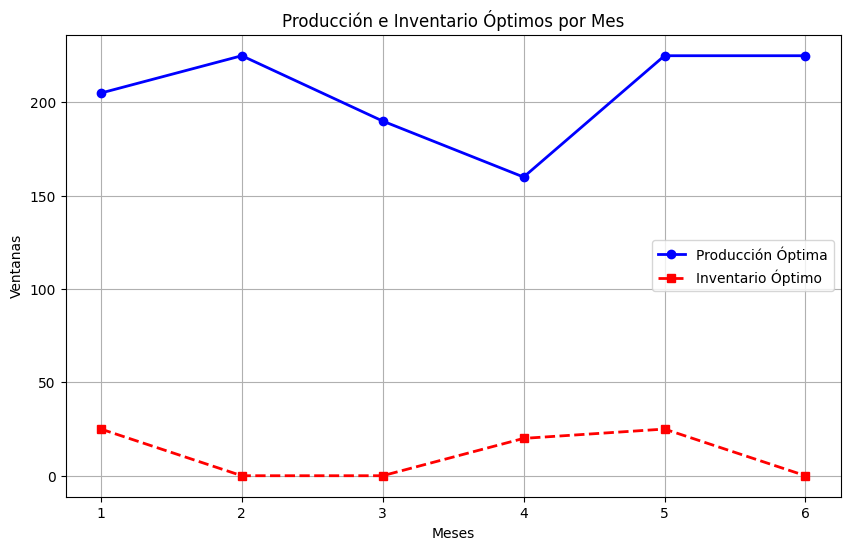


Tabla comparativa de costos:
Mes | Producción Óptima | Costo Producción Óptima | Inventario Óptimo | Costo Inventario Óptimo | Costo Total Óptimo | Producción No Óptima | Costo Producción No Óptima | Ahorro
1   |           205.00 | $               10,250.00 |            25.00 | $                   200.00 | $       10,450.00 |            180.00 | $                  9,000.00 | $ -1,450.00
2   |           225.00 | $               10,125.00 |             0.00 | $                     0.00 | $       10,125.00 |            250.00 | $                 11,250.00 | $  1,125.00
3   |           190.00 | $               10,450.00 |             0.00 | $                     0.00 | $       10,450.00 |            190.00 | $                 10,450.00 | $      0.00
4   |           160.00 | $                8,320.00 |            20.00 | $                   200.00 | $        8,520.00 |            140.00 | $                  7,280.00 | $ -1,240.00
5   |           225.00 | $               10,800.00 |        

In [1]:
import pulp
import matplotlib.pyplot as plt

problema = pulp.LpProblem("Produccion_de_ventanas", pulp.LpMinimize)

# Parámetros
demanda = [180, 250, 190, 140, 220, 250]
costos_produccion = [50, 45, 55, 52, 48, 50]
costos_almacenamiento = [8, 10, 10, 10, 8, 8]
capacidad_maxima = 225

# Variables de decisión
produccion = pulp.LpVariable.dicts("Produccion", range(6), lowBound=0, upBound=capacidad_maxima, cat='Continuous')
inventario = pulp.LpVariable.dicts("Inventario", range(6), lowBound=0, cat='Continuous')

problema += pulp.lpSum([costos_produccion[i] * produccion[i] + costos_almacenamiento[i] * inventario[i] for i in range(6)]), "Costo_Total"

# Restricciones de balance de inventario
problema += produccion[0] == demanda[0] + inventario[0], "Balance_Inventario_Mes_1"
for i in range(1, 6):
    problema += produccion[i] + inventario[i-1] == demanda[i] + inventario[i], f"Balance_Inventario_Mes_{i+1}"

# Restricción de capacidad de producción
for i in range(6):
    problema += produccion[i] <= capacidad_maxima, f"Capacidad_Maxima_Mes_{i+1}"

problema.solve()

# Resultados óptimos
produccion_optima = [pulp.value(produccion[i]) for i in range(6)]
inventario_optimo = [pulp.value(inventario[i]) for i in range(6)]
costo_total_optimo = pulp.value(problema.objective)


print("Producción óptima por mes:")
for i in range(6):
    print(f"Mes {i+1}: {produccion_optima[i]} ventanas")

print("\nInventario óptimo al final de cada mes:")
for i in range(6):
    print(f"Mes {i+1}: {inventario_optimo[i]} ventanas")

print(f"\nCosto total óptimo: ${costo_total_optimo:,.2f}")


produccion_no_optima = demanda
inventario_no_optimo = [0] * 6 


costo_no_optimo = sum([costos_produccion[i] * produccion_no_optima[i] for i in range(6)])

ahorro = costo_no_optimo - costo_total_optimo
print(f"\nCosto total no óptimo: ${costo_no_optimo:,.2f}")
print(f"Ahorro generado con la solución óptima: ${ahorro:,.2f}")
meses = list(range(1, 7))
plt.figure(figsize=(10, 6))
plt.plot(meses, produccion_optima, label="Producción Óptima", marker='o', color='b', linestyle='-', linewidth=2)
plt.plot(meses, inventario_optimo, label="Inventario Óptimo", marker='s', color='r', linestyle='--', linewidth=2)
plt.xlabel('Meses')
plt.ylabel('Ventanas')
plt.title('Producción e Inventario Óptimos por Mes')
plt.legend()
plt.grid(True)
plt.show()

print("\nTabla comparativa de costos:")
print("Mes | Producción Óptima | Costo Producción Óptima | Inventario Óptimo | Costo Inventario Óptimo | Costo Total Óptimo | Producción No Óptima | Costo Producción No Óptima | Ahorro")
for i in range(6):
    costo_produccion_optima = costos_produccion[i] * produccion_optima[i]
    costo_inventario_optimo = costos_almacenamiento[i] * inventario_optimo[i]
    costo_total_optimo_mes = costo_produccion_optima + costo_inventario_optimo
    costo_produccion_no_optima = costos_produccion[i] * produccion_no_optima[i]
    
    ahorro_mes = costo_produccion_no_optima - costo_total_optimo_mes
    
    print(f"{i+1}   | {produccion_optima[i]:>16.2f} | ${costo_produccion_optima:>24,.2f} | {inventario_optimo[i]:>16.2f} | ${costo_inventario_optimo:>25,.2f} | ${costo_total_optimo_mes:>16,.2f} | {produccion_no_optima[i]:>17.2f} | ${costo_produccion_no_optima:>26,.2f} | ${ahorro_mes:>10,.2f}")


In [2]:
import pulp
import matplotlib.pyplot as plt
problema_enteras = pulp.LpProblem("Produccion_de_ventanas_enteras", pulp.LpMinimize)
demanda = [180, 250, 190, 140, 220, 250]
costos_produccion = [50, 45, 55, 52, 48, 50]
costos_almacenamiento = [8, 10, 10, 10, 8, 8]
capacidad_maxima = 225
produccion_enteras = pulp.LpVariable.dicts("Produccion", range(6), lowBound=0, upBound=capacidad_maxima, cat='Integer')
inventario_enteras = pulp.LpVariable.dicts("Inventario", range(6), lowBound=0, cat='Integer')


problema_enteras += pulp.lpSum([costos_produccion[i] * produccion_enteras[i] + costos_almacenamiento[i] * inventario_enteras[i] for i in range(6)]), "Costo_Total_Entero"


problema_enteras += produccion_enteras[0] == demanda[0] + inventario_enteras[0], "Balance_Inventario_Mes_1_Entero"
for i in range(1, 6):
    problema_enteras += produccion_enteras[i] + inventario_enteras[i-1] == demanda[i] + inventario_enteras[i], f"Balance_Inventario_Mes_{i+1}_Entero"


for i in range(6):
    problema_enteras += produccion_enteras[i] <= capacidad_maxima, f"Capacidad_Maxima_Mes_{i+1}_Entero"


problema_enteras.solve()

produccion_optima_enteras = [pulp.value(produccion_enteras[i]) for i in range(6)]
inventario_optimo_enteras = [pulp.value(inventario_enteras[i]) for i in range(6)]
costo_total_optimo_enteras = pulp.value(problema_enteras.objective)

print("Producción óptima (enteros) por mes:")
for i in range(6):
    print(f"Mes {i+1}: {produccion_optima_enteras[i]} ventanas")

print("\nInventario óptimo (enteros) al final de cada mes:")
for i in range(6):
    print(f"Mes {i+1}: {inventario_optimo_enteras[i]} ventanas")

print(f"\nCosto total óptimo con restricciones enteras: ${costo_total_optimo_enteras:,.2f}")


Producción óptima (enteros) por mes:
Mes 1: 205.0 ventanas
Mes 2: 225.0 ventanas
Mes 3: 190.0 ventanas
Mes 4: 160.0 ventanas
Mes 5: 225.0 ventanas
Mes 6: 225.0 ventanas

Inventario óptimo (enteros) al final de cada mes:
Mes 1: 25.0 ventanas
Mes 2: 0.0 ventanas
Mes 3: 0.0 ventanas
Mes 4: 20.0 ventanas
Mes 5: 25.0 ventanas
Mes 6: 0.0 ventanas

Costo total óptimo con restricciones enteras: $61,795.00


# Ejercicio 3 

A y B

In [9]:
import pulp


problema = pulp.LpProblem("Autobuses", pulp.LpMinimize)

# Variables de decisión: cantidad de autobuses que inician su turno
x1 = pulp.LpVariable("x1", lowBound=0, cat='Continuous')
x2 = pulp.LpVariable("x2", lowBound=0, cat='Continuous')
x3 = pulp.LpVariable("x3", lowBound=0, cat='Continuous')
x4 = pulp.LpVariable("x4", lowBound=0, cat='Continuous')
x5 = pulp.LpVariable("x5", lowBound=0, cat='Continuous')
x6 = pulp.LpVariable("x6", lowBound=0, cat='Continuous')

# Explicación del problema
print("Formulación del problema de programación lineal:")
print("Objetivo: Minimizar el número total de autobuses utilizados para satisfacer la demanda de transporte en cada tramo de tiempo.")
print("\nVariables de decisión: ")
print("x1: cantidad de autobuses que inician en el turno 1 (00:00 AM - 07:59 AM)")
print("x2: cantidad de autobuses que inician en el turno 2 (04:00 AM - 11:59 AM)")
print("x3: cantidad de autobuses que inician en el turno 3 (08:00 AM - 03:59 PM)")
print("x4: cantidad de autobuses que inician en el turno 4 (12:00 PM - 07:59 PM)")
print("x5: cantidad de autobuses que inician en el turno 5 (04:00 PM - 11:59 PM)")
print("x6: cantidad de autobuses que inician en el turno 6 (08:00 PM - 03:59 AM)")

# Función objetivo: minimizar el número total de autobuses
objetivo = x1 + x2 + x3 + x4 + x5 + x6
problema += objetivo, "Número total de autobuses"

# Función objetivo 
print("\nFunción objetivo: Minimizar Z")
print(f"Z = x1 + x2 + x3 + x4 + x5 + x6")
print("\nRestricciones:")

# Restricciones de demanda en cada tramo de tiempo
restriccion1 = x1 + x6 >= 4
restriccion2 = x1 + x2 >= 8
restriccion3 = x2 + x3 >= 10
restriccion4 = x3 + x4 >= 7
restriccion5 = x4 + x5 >= 12
restriccion6 = x5 + x6 >= 4

# Añadir las restricciones al modelo
problema += restriccion1, "Demanda_00AM-04AM"
problema += restriccion2, "Demanda_04AM-08AM"
problema += restriccion3, "Demanda_08AM-12PM"
problema += restriccion4, "Demanda_12PM-04PM"
problema += restriccion5, "Demanda_04PM-08PM"
problema += restriccion6, "Demanda_08PM-12AM"

# restricciones con detalles
print("1) x1 + x6 >= 4  (Demanda de 00:00 AM a 04:00 AM, al menos 4 autobuses)")
print("2) x1 + x2 >= 8  (Demanda de 04:00 AM a 08:00 AM, al menos 8 autobuses)")
print("3) x2 + x3 >= 10 (Demanda de 08:00 AM a 12:00 PM, al menos 10 autobuses)")
print("4) x3 + x4 >= 7  (Demanda de 12:00 PM a 04:00 PM, al menos 7 autobuses)")
print("5) x4 + x5 >= 12 (Demanda de 04:00 PM a 08:00 PM, al menos 12 autobuses)")
print("6) x5 + x6 >= 4  (Demanda de 08:00 PM a 12:00 AM, al menos 4 autobuses)")

problema.solve()

print("\nEstado de la solución:", pulp.LpStatus[problema.status])
print("\nSolución óptima encontrada:")
print("Número óptimo de autobuses que inician en cada turno:")
print(f"Turno 1 (00:00 - 07:59): {x1.varValue} autobuses")
print(f"Turno 2 (04:00 - 11:59): {x2.varValue} autobuses")
print(f"Turno 3 (08:00 - 15:59): {x3.varValue} autobuses")
print(f"Turno 4 (12:00 - 19:59): {x4.varValue} autobuses")
print(f"Turno 5 (16:00 - 23:59): {x5.varValue} autobuses")
print(f"Turno 6 (20:00 - 03:59): {x6.varValue} autobuses")

print(f"\nNúmero total mínimo de autobuses: {pulp.value(problema.objective)}")



Formulación del problema de programación lineal:
Objetivo: Minimizar el número total de autobuses utilizados para satisfacer la demanda de transporte en cada tramo de tiempo.

Variables de decisión: 
x1: cantidad de autobuses que inician en el turno 1 (00:00 AM - 07:59 AM)
x2: cantidad de autobuses que inician en el turno 2 (04:00 AM - 11:59 AM)
x3: cantidad de autobuses que inician en el turno 3 (08:00 AM - 03:59 PM)
x4: cantidad de autobuses que inician en el turno 4 (12:00 PM - 07:59 PM)
x5: cantidad de autobuses que inician en el turno 5 (04:00 PM - 11:59 PM)
x6: cantidad de autobuses que inician en el turno 6 (08:00 PM - 03:59 AM)

Función objetivo: Minimizar Z
Z = x1 + x2 + x3 + x4 + x5 + x6

Restricciones:
1) x1 + x6 >= 4  (Demanda de 00:00 AM a 04:00 AM, al menos 4 autobuses)
2) x1 + x2 >= 8  (Demanda de 04:00 AM a 08:00 AM, al menos 8 autobuses)
3) x2 + x3 >= 10 (Demanda de 08:00 AM a 12:00 PM, al menos 10 autobuses)
4) x3 + x4 >= 7  (Demanda de 12:00 PM a 04:00 PM, al menos 7

# Ejercicio 4

A y B

In [7]:
import pulp as lp

print("Objetivo: Maximizar la recaudación de impuestos con las limitaciones dadas.")
print("Variables de decisión:")
print(" x1: Número de unidades de casas sencillas")
print(" x2: Número de unidades de casas dobles")
print(" x3: Número de unidades de casas triples")
print(" x4: Número de unidades de casas cuádruples\n")

model = lp.LpProblem("Maximizar_Impuestos", lp.LpMaximize)

# Definir variables continuas
x1 = lp.LpVariable("x1", lowBound=0, cat="Continuous")  # Unidades sencillas
x2 = lp.LpVariable("x2", lowBound=0, cat="Continuous")  # Unidades dobles
x3 = lp.LpVariable("x3", lowBound=0, cat="Continuous")  # Unidades triples
x4 = lp.LpVariable("x4", lowBound=0, cat="Continuous")  # Unidades cuádruples

print("Función objetivo")
print("Maximizar la recaudación total de impuestos:")
print(" Z = 1000*x1 + 1900*x2 + 2700*x3 + 3400*x4\n")

# Función objetivo
model += 1000*x1 + 1900*x2 + 2700*x3 + 3400*x4, "Impuestos Totales"

print("Restricciones:")
print(" 1. Área utilizable: 0.18*x1 + 0.28*x2 + 0.4*x3 + 0.5*x4 <= 63.75 acres")
print(" 2. Financiamiento: 50000*x1 + 70000*x2 + 130000*x3 + 160000*x4 <= 15,000,000")
print(" 3. Unidades triples y cuádruples >= 25% del total")
print(" 4. Unidades sencillas >= 20% del total")
print(" 5. Unidades dobles >= 10% del total\n")

# Restricciones
# 1. Área utilizable
model += 0.18*x1 + 0.28*x2 + 0.4*x3 + 0.5*x4 <= 63.75, "Restriccion_Area"

# 2. Financiamiento
model += 50000*x1 + 70000*x2 + 130000*x3 + 160000*x4 <= 15000000, "Restriccion_Financiamiento"

# 3. Unidades triples y cuádruples >= 25% del total
model += x3 + x4 >= 0.25*(x1 + x2 + x3 + x4), "Restriccion_Triples_Cuadruples"

# 4. Unidades sencillas >= 20% del total
model += x1 >= 0.2*(x1 + x2 + x3 + x4), "Restriccion_Sencillas"

# 5. Unidades dobles >= 10% del total
model += x2 >= 0.1*(x1 + x2 + x3 + x4), "Restriccion_Dobles"

model.solve()

print(f"Estado: {lp.LpStatus[model.status]}")
print(f"Unidades sencillas: {x1.varValue}")
print(f"Unidades dobles: {x2.varValue}")
print(f"Unidades triples: {x3.varValue}")
print(f"Unidades cuádruples: {x4.varValue}")
print(f"Impuestos Totales: {lp.value(model.objective)}")

Objetivo: Maximizar la recaudación de impuestos con las limitaciones dadas.
Variables de decisión:
 x1: Número de unidades de casas sencillas
 x2: Número de unidades de casas dobles
 x3: Número de unidades de casas triples
 x4: Número de unidades de casas cuádruples

Función objetivo
Maximizar la recaudación total de impuestos:
 Z = 1000*x1 + 1900*x2 + 2700*x3 + 3400*x4

Restricciones:
 1. Área utilizable: 0.18*x1 + 0.28*x2 + 0.4*x3 + 0.5*x4 <= 63.75 acres
 2. Financiamiento: 50000*x1 + 70000*x2 + 130000*x3 + 160000*x4 <= 15,000,000
 3. Unidades triples y cuádruples >= 25% del total
 4. Unidades sencillas >= 20% del total
 5. Unidades dobles >= 10% del total

Estado: Optimal
Unidades sencillas: 37.037037
Unidades dobles: 101.85185
Unidades triples: 46.296296
Unidades cuádruples: 0.0
Impuestos Totales: 355555.5512


C

In [8]:
import pulp as lp

model = lp.LpProblem("Maximizar_Impuestos", lp.LpMaximize)

x1 = lp.LpVariable("x1", lowBound=0, cat="Integer")
x2 = lp.LpVariable("x2", lowBound=0, cat="Integer")
x3 = lp.LpVariable("x3", lowBound=0, cat="Integer")
x4 = lp.LpVariable("x4", lowBound=0, cat="Integer")

model += 1000*x1 + 1900*x2 + 2700*x3 + 3400*x4, "Impuestos Totales"

# Restricciones
model += 0.18*x1 + 0.28*x2 + 0.4*x3 + 0.5*x4 <= 63.75, "Restriccion_Area"
model += 50000*x1 + 70000*x2 + 130000*x3 + 160000*x4 <= 15000000, "Restriccion_Financiamiento"
model += x3 + x4 >= 0.25*(x1 + x2 + x3 + x4), "Restriccion_Triples_Cuadruples"
model += x1 >= 0.2*(x1 + x2 + x3 + x4), "Restriccion_Sencillas"
model += x2 >= 0.1*(x1 + x2 + x3 + x4), "Restriccion_Dobles"

model.solve()

print(f"Estado: {lp.LpStatus[model.status]}")
print(f"Unidades sencillas: {x1.varValue}")
print(f"Unidades dobles: {x2.varValue}")
print(f"Unidades triples: {x3.varValue}")
print(f"Unidades cuádruples: {x4.varValue}")
print(f"Impuestos Totales: {lp.value(model.objective)}")


Estado: Optimal
Unidades sencillas: 36.0
Unidades dobles: 99.0
Unidades triples: 31.0
Unidades cuádruples: 14.0
Impuestos Totales: 355400.0
